In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [50]:
data = pd.read_csv('kidney_disease.csv')

In [51]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [52]:
data.drop('id', axis =1, inplace =True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [53]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [54]:
features = data.columns
features

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [55]:
obj_features = np.array([])
numeric_features = np.array([])

for feature in features:
    if data[feature].dtypes == object:
        obj_features = np.append(obj_features, feature)
    else:
        numeric_features = np.append(numeric_features, feature)

In [56]:
for feature in obj_features:
    print(feature, ': ', data[feature].unique(), '\n')

rbc :  [nan 'normal' 'abnormal'] 

pc :  ['normal' 'abnormal' nan] 

pcc :  ['notpresent' 'present' nan] 

ba :  ['notpresent' 'present' nan] 

pcv :  ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] 

wc :  ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4

In [57]:
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')

In [58]:
obj_features = np.array([])
numeric_features = np.array([])

for feature in features:
    if data[feature].dtypes == object:
        obj_features = np.append(obj_features, feature)
    else:
        numeric_features = np.append(numeric_features, feature)

In [59]:
for feature in obj_features:
    print(feature, ': ', data[feature].unique(), '\n')

rbc :  [nan 'normal' 'abnormal'] 

pc :  ['normal' 'abnormal' nan] 

pcc :  ['notpresent' 'present' nan] 

ba :  ['notpresent' 'present' nan] 

htn :  ['yes' 'no' nan] 

dm :  ['yes' 'no' ' yes' '\tno' '\tyes' nan] 

cad :  ['no' 'yes' '\tno' nan] 

appet :  ['good' 'poor' nan] 

pe :  ['no' 'yes' nan] 

ane :  ['no' 'yes' nan] 

classification :  ['ckd' 'ckd\t' 'notckd'] 



In [60]:
data = data.replace({'dm':{'\tno':'no', '\tyes':'yes', ' yes':'yes'} ,'cad':{'\tno':'no'}, 'classification':{'ckd\t':'ckd'}})

In [61]:
for feature in obj_features:
    print(feature, ': ', data[feature].unique(), '\n')

rbc :  [nan 'normal' 'abnormal'] 

pc :  ['normal' 'abnormal' nan] 

pcc :  ['notpresent' 'present' nan] 

ba :  ['notpresent' 'present' nan] 

htn :  ['yes' 'no' nan] 

dm :  ['yes' 'no' nan] 

cad :  ['no' 'yes' nan] 

appet :  ['good' 'poor' nan] 

pe :  ['no' 'yes' nan] 

ane :  ['no' 'yes' nan] 

classification :  ['ckd' 'notckd'] 



In [62]:
print('Null values count in Numerical Features \n')

for i in numeric_features:
    print(i, ': ', data[i].isna().sum())

Null values count in Numerical Features 

age :  9
bp :  12
sg :  47
al :  46
su :  49
bgr :  44
bu :  19
sc :  17
sod :  87
pot :  88
hemo :  52
pcv :  71
wc :  106
rc :  131


In [63]:
for i in numeric_features:
    data[i].fillna(data[i].mean(), inplace =True)

for i in numeric_features:
    print(i, ': ', data[i].isna().sum())
    
data.head(20)

age :  0
bp :  0
sg :  0
al :  0
su :  0
bgr :  0
bu :  0
sc :  0
sod :  0
pot :  0
hemo :  0
pcv :  0
wc :  0
rc :  0


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.000000,0.000000,NaN,normal,notpresent,notpresent,121.000000,...,44.000000,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020000,4.000000,0.000000,NaN,normal,notpresent,notpresent,148.036517,...,38.000000,6000.000000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010000,2.000000,3.000000,normal,normal,notpresent,notpresent,423.000000,...,31.000000,7500.000000,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005000,4.000000,0.000000,normal,abnormal,present,notpresent,117.000000,...,32.000000,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010000,2.000000,0.000000,normal,normal,notpresent,notpresent,106.000000,...,35.000000,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015000,3.000000,0.000000,NaN,NaN,notpresent,notpresent,74.000000,...,39.000000,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010000,0.000000,0.000000,NaN,normal,notpresent,notpresent,100.000000,...,36.000000,8406.122449,4.707435,no,no,no,good,no,no,ckd
7,24.0,76.469072,1.015000,2.000000,4.000000,normal,abnormal,notpresent,notpresent,410.000000,...,44.000000,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015000,3.000000,0.000000,normal,abnormal,present,notpresent,138.000000,...,33.000000,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020000,2.000000,0.000000,abnormal,abnormal,present,notpresent,70.000000,...,29.000000,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


In [64]:
# replace cat
print('Null values count in Categorical Features \n')

for i in obj_features:
    print(i, ': ', data[i].isna().mean())

Null values count in Categorical Features 

rbc :  0.38
pc :  0.1625
pcc :  0.01
ba :  0.01
htn :  0.005
dm :  0.005
cad :  0.005
appet :  0.0025
pe :  0.0025
ane :  0.0025
classification :  0.0


In [65]:
data = data.drop('rbc', axis=1)

In [66]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.000000,36.0,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,148.036517,18.0,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.000000,53.0,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.000000,56.0,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.000000,26.0,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.000000,49.0,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.000000,31.0,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.000000,26.0,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.000000,50.0,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


In [67]:
obj_features = np.array([])
numeric_features = np.array([])

for feature in data.columns:
    if data[feature].dtypes == object:
        obj_features = np.append(obj_features, feature)
    else:
        numeric_features = np.append(numeric_features, feature)

In [68]:
for i in obj_features:
    print(i, ': ', data[i].isna().sum())

pc :  0
pcc :  0
ba :  0
htn :  0
dm :  0
cad :  0
appet :  0
pe :  0
ane :  0
classification :  0


In [69]:
from sklearn import preprocessing   

label = preprocessing.LabelEncoder() 

for i in obj_features:
    data[i]= label.fit_transform(data[i]) 

Visualization

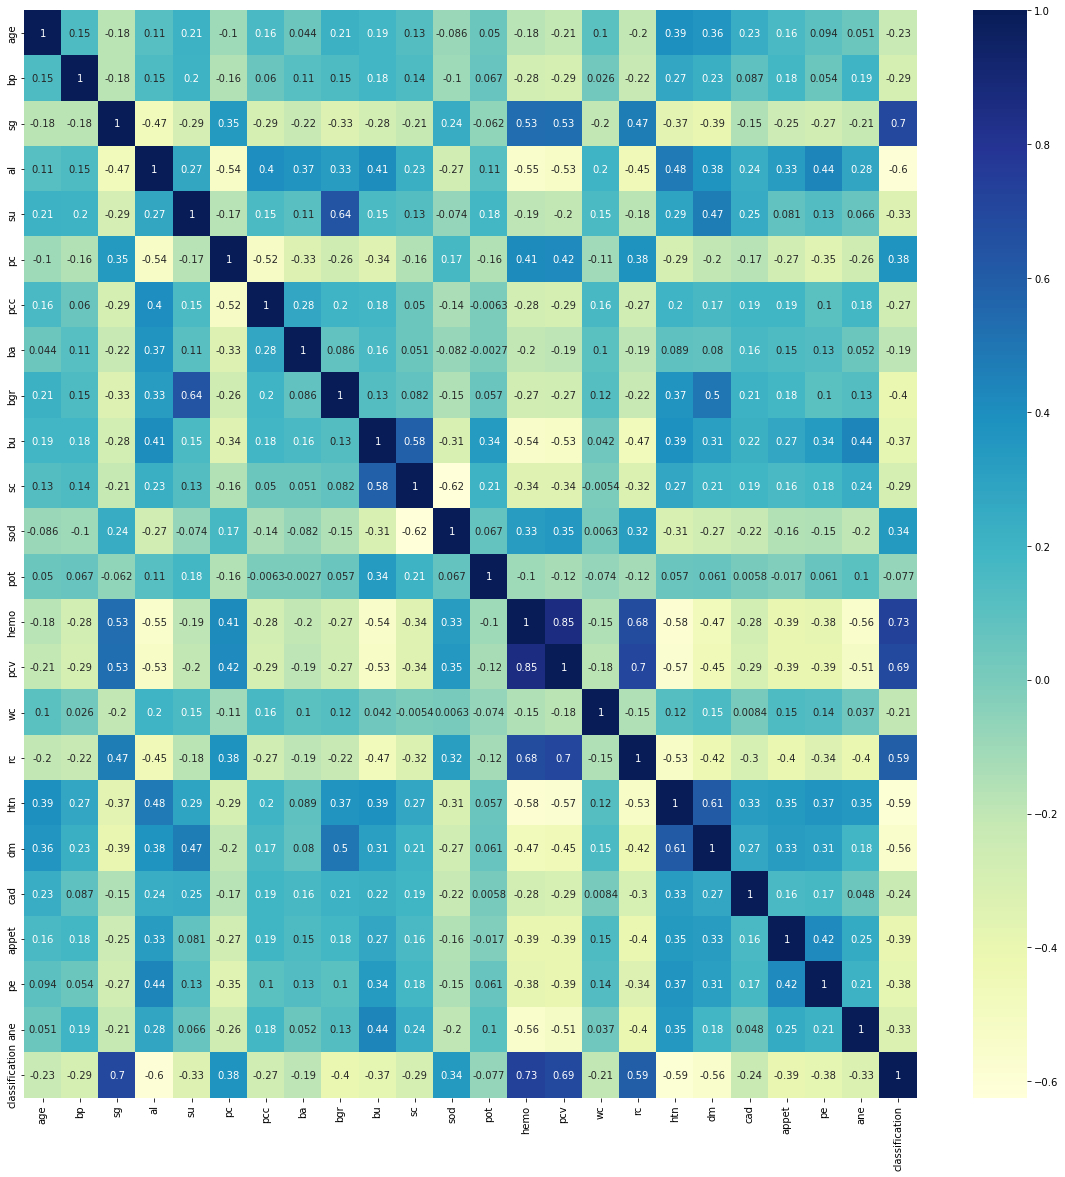

In [81]:
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='classification', ylabel='count'>

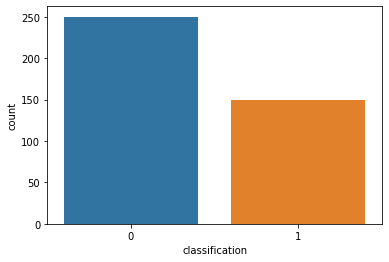

In [79]:
sns.countplot(x = 'classification',data = data)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>,
        <AxesSubplot:title={'center':'su'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'pcc'}>,
        <AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'bgr'}>,
        <AxesSubplot:title={'center':'bu'}>],
       [<AxesSubplot:title={'center':'sc'}>,
        <AxesSubplot:title={'center':'sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'hemo'}>,
        <AxesSubplot:title={'center':'pcv'}>],
       [<AxesSubplot:title={'center':'wc'}>,
        <AxesSubplot:title={'center':'rc'}>,
        <AxesSubplot:title={'center':'htn'}>,
        <AxesSubplot:title={'center':'dm'}>,
        <AxesSubplot:title={'center':'cad'}>],
       [<AxesSubplot:title={'center':'appet'}>,
        <AxesSubplot:title={'center':'

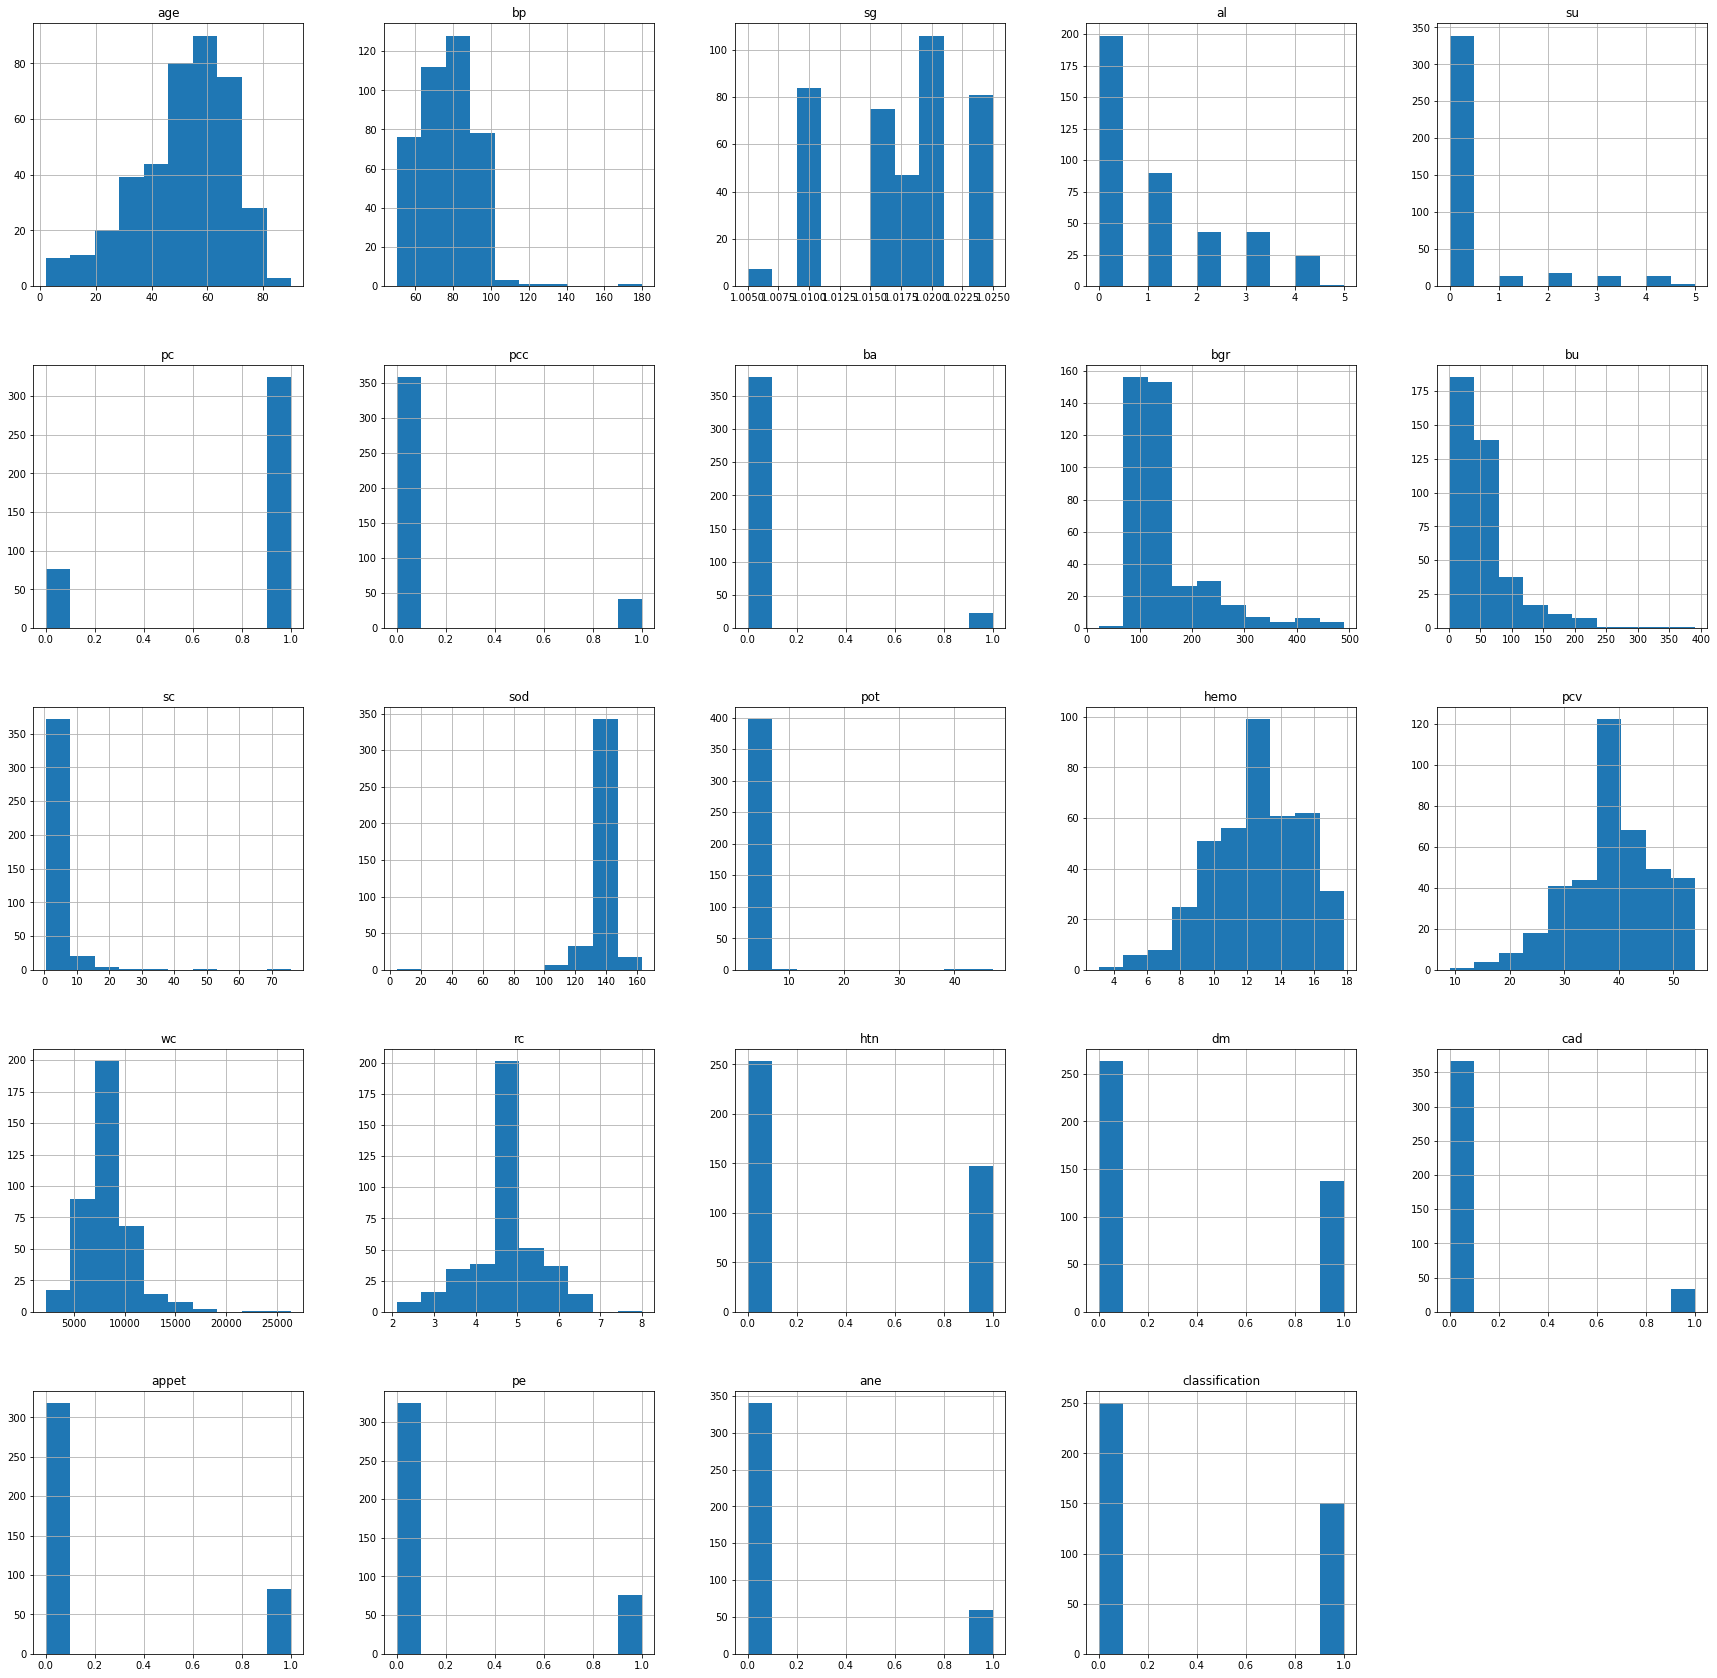

In [80]:
data.hist(figsize = (30,30))